# Defining the Atmosphere

In this notebook we provide some examples showing how NemesisPy can be used to interact with the Atmosphere reference class, which defines the atmospheric vertical profiles in a retrieval through a couple of input files (*.ref*, *aerosol.ref*). Here, we will show how it is possible to read these input files, modify them based on our needs, and then write new files again.

In [1]:
from NemesisPy import *

## Reading the input .ref file

In this section we show how the *ref* file can be read using the Atmosphere class. One important thing that must be noted is the difference in units between the file and the class: while the reference file includes the altitude and pressure in m and atm, respectively, the reference class works with altitude and pressure in m and Pa. This unit conversion is automatically taken into account when reading/writing the files with NemesisPy, but watch out.

Planet :: Jupiter
Number of profiles ::  1
Latitude of profiles ::  11.48
Number of altitude points ::  40
Minimum/maximum heights (km) ::  -87.058 145.004
Maximum/minimum pressure (atm) ::  9.8717 0.0010765
Maximum/minimum temperature (K) 338.16 113.7513
Maximum/minimum gravity (m/s2) ::  23.32 23.14
Maximum/minimum molecular weight ::  0.002337783305114338 0.0023064003295028427
Number of gaseous species ::  15
Gaseous species ::  ['NH3', 'PH3', 'C2H2', 'C2H4', 'C2H6', 'C4H2', 'H2', 'He', 'CH4 (1)', 'CH4 (2)', 'CH4 (3)', 'GeH4', 'AsH3', 'CO', 'H2O']
Number of aerosol populations ::  0


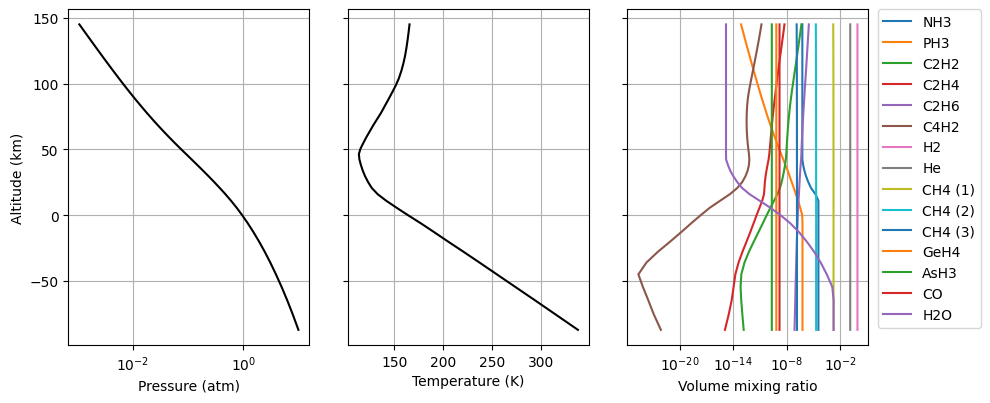

In [2]:
#initialise the Atmosphere class
Atmosphere = Atmosphere_0(runname='jupiter')

#Read the .ref file
Atmosphere.read_ref()

#Printing summary of information
Atmosphere.summary_info()

#Making a standard summary plot for the atmosphere
Atmosphere.plot_Atm()

## Modifying the gaseous atmosphere

In this section, we show some examples of how the Atmosphere class can be used to modify the atmospheric profiles or used to perform some useful calculations. In particular, we will show how to:

- Add/remove gases from the atmosphere and edit their abundances.
- Re-calculate altitudes based on hydrostatic equilibrium equation (fixing the pressure levels).
- Re-calculate pressure levels based on hydrostatic equilibrium equation (fixing altitude levels).
- Calculate the atmospheric density at each level.

Planet :: Jupiter
Number of profiles ::  1
Latitude of profiles ::  11.48
Number of altitude points ::  40
Minimum/maximum heights (km) ::  -87.058 145.004
Maximum/minimum pressure (atm) ::  9.8717 0.0010765
Maximum/minimum temperature (K) 338.16 113.7513
Maximum/minimum gravity (m/s2) ::  23.32 23.14
Maximum/minimum molecular weight ::  0.002337783305114338 0.0023064003295028427
Number of gaseous species ::  15
Gaseous species ::  ['NH3', 'PH3', 'C2H2', 'C2H4', 'C2H6', 'C4H2', 'H2', 'He', 'CH4 (1)', 'CH4 (2)', 'GeH4', 'AsH3', 'CO', 'H2O', 'OH']
Number of aerosol populations ::  0


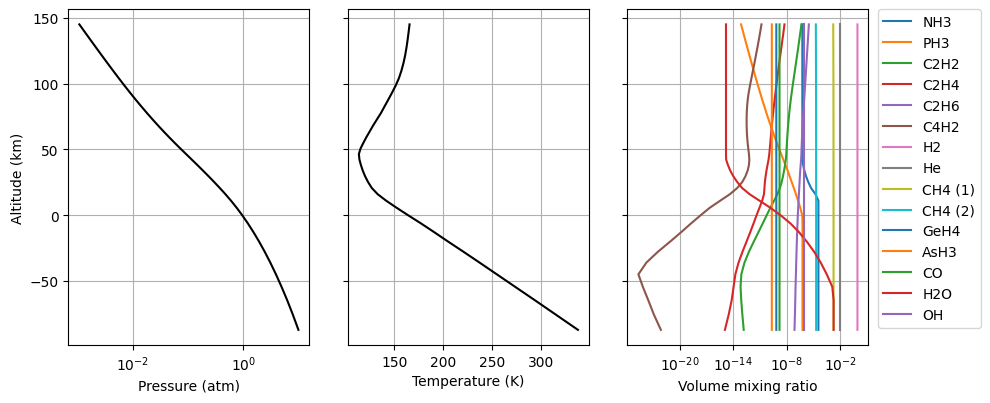

In [3]:
#Add OH in the atmosphere
ID_oh = 13
ISO_oh = 0
vmr_oh = np.ones(Atmosphere.NP) * 1.0e-6

Atmosphere.add_gas(ID_oh,ISO_oh,vmr_oh)

#Remove third isotope of CH4 from the atmosphere
ID_ch4_iso3 = 6
ISO_ch4_iso3 = 3

Atmosphere.remove_gas(ID_ch4_iso3,ISO_ch4_iso3)

#Edit the abundance of He in the atmosphere
ID_He = 40
ISO_He = 0
vmr_He = np.ones(Atmosphere.NP) * 0.01

Atmosphere.update_gas(ID_He,ISO_He,vmr_He)

#Printing new summary information
Atmosphere.summary_info()

#Plotting summary figure
Atmosphere.plot_Atm()

In [4]:
#Re-calculate altitude levels based on hydrostatic equilibrium equation (fixing pressure levels)
Atmosphere.adjust_hydrostatH()

#Printing new summary information
Atmosphere.summary_info()

Planet :: Jupiter
Number of profiles ::  1
Latitude of profiles ::  11.48
Number of altitude points ::  40
Minimum/maximum heights (km) ::  -87.099200150887 145.55376536975209
Maximum/minimum pressure (atm) ::  9.8717 0.0010765
Maximum/minimum temperature (K) 338.16 113.7513
Maximum/minimum gravity (m/s2) ::  23.32 23.14
Maximum/minimum molecular weight ::  0.002337783305114338 0.0023064003295028427
Number of gaseous species ::  15
Gaseous species ::  ['NH3', 'PH3', 'C2H2', 'C2H4', 'C2H6', 'C4H2', 'H2', 'He', 'CH4 (1)', 'CH4 (2)', 'GeH4', 'AsH3', 'CO', 'H2O', 'OH']
Number of aerosol populations ::  0


In [5]:
#Re-calculate prssure levels based on hydrostatic equilibrium equation (fixing altitude levels)
#In this case, we need to define the pressure level at a given altitude (e.g., we define the 1-bar level at 5 km)
htan = 5.0e3  #5 km in m
ptan = 1.0e5  #1-bar in Pa
Atmosphere.adjust_hydrostatP(htan,ptan)

#Printing new summary information
Atmosphere.summary_info()

Planet :: Jupiter
Number of profiles ::  1
Latitude of profiles ::  11.48
Number of altitude points ::  40
Minimum/maximum heights (km) ::  -87.099200150887 145.55376536975209
Maximum/minimum pressure (atm) ::  12.557408275788838 0.001369418148139207
Maximum/minimum temperature (K) 338.16 113.7513
Maximum/minimum gravity (m/s2) ::  23.32 23.14
Maximum/minimum molecular weight ::  0.002337783305114338 0.0023064003295028427
Number of gaseous species ::  15
Gaseous species ::  ['NH3', 'PH3', 'C2H2', 'C2H4', 'C2H6', 'C4H2', 'H2', 'He', 'CH4 (1)', 'CH4 (2)', 'GeH4', 'AsH3', 'CO', 'H2O', 'OH']
Number of aerosol populations ::  0


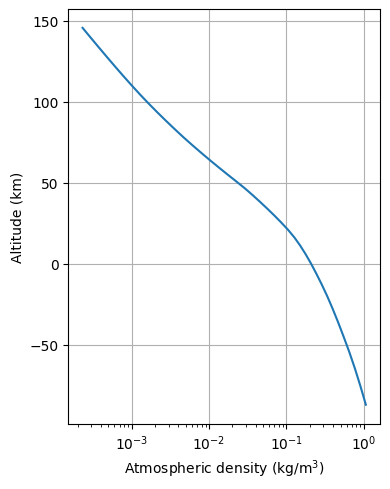

In [6]:
#Calculate atmospheric density
RHO = Atmosphere.calc_rho()

fig,ax1  = plt.subplots(1,1,figsize=(4,5))
ax1.semilogx(RHO,Atmosphere.H/1.0e3)
ax1.set_xlabel('Atmospheric density (kg/m$^{3}$)')
ax1.set_ylabel('Altitude (km)')
ax1.grid()
plt.tight_layout()

## Reading the aerosol.ref file

In this section we show how the *ref* file can be read using the Atmosphere class. One important thing that must be noted is the difference in units between the *aerosol.ref* files in NemesisPy and in NEMESIS. While NemesisPy includes the aerosol density in particles per m$^{3}$, NEMESIS expects the units of these profiles to be in particles per gram of atmosphere. This has to be taken into account if using NemesisPy as an interaction tool with NEMESIS, as this unit conversion must be performed by the user.

Planet :: Jupiter
Number of profiles ::  1
Latitude of profiles ::  11.48
Number of altitude points ::  40
Minimum/maximum heights (km) ::  -87.058 145.004
Maximum/minimum pressure (atm) ::  9.8717 0.0010765
Maximum/minimum temperature (K) 338.16 113.7513
Maximum/minimum gravity (m/s2) ::  23.32 23.14
Maximum/minimum molecular weight ::  0.002337783305114338 0.0023064003295028427
Number of gaseous species ::  15
Gaseous species ::  ['NH3', 'PH3', 'C2H2', 'C2H4', 'C2H6', 'C4H2', 'H2', 'He', 'CH4 (1)', 'CH4 (2)', 'CH4 (3)', 'GeH4', 'AsH3', 'CO', 'H2O']
Number of aerosol populations ::  2


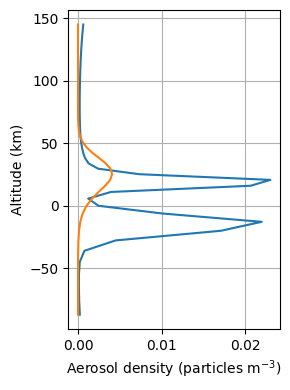

In [7]:
#Reading again the .ref file and reading the aerosol.ref file
Atmosphere.read_ref()
Atmosphere.read_aerosol()

#Printing summary
Atmosphere.summary_info()

#Plotting aerosol profiles
Atmosphere.plot_Dust()

## Write the .ref and aerosol.ref files

After we have defined all required parameters in the Atmosphere class, we can write the relevant files so that they can be later used to compute a forward model or to run a retrieval. This is simply performed using the *write_ref()* and *write_aerosol()* functions of the Atmosphere class.

In [8]:
#Reading .ref and aerosol.ref files
Atmosphere = Atmosphere_0(runname='jupiter')
Atmosphere.read_ref()
Atmosphere.read_aerosol()

#Perform all the modifications we require
#....

#Write the results into files
Atmosphere.write_aerosol()
Atmosphere.write_ref()